# Introduction

When it comes to property values, it is common to hear the phrase, "location, location, location", as the variable that dominates in influence on overall home value. But what other factors come into play in determining the price of a home? These factors are examined in this dataset. My prediction is that variables such as YearBuilt, OverallQual, OverallCond, Neighborhood, GrLivArea, KitchenQual will play the biggest roles in determining SalePrice.

# Analysis Strategy

The following is the analysis strategy to predict SalesPrice and determine which variables play the biggest roles in SalePrice. As the final step, various modeling techniques will be used on the entire dataset (without features that had too many missing values).

1. Clean the data
    - Process and summarize data
    - Handle duplicate and missing data
    - Remove irrelevant data

2. EDA Plan
    - Determine quantitative and qualitative features
    - Encode qualitative features
    - Determine most important features using heat maps
    - Analyze dependent variable, SalePrice

3. Modeling
    - Linear Regression
    - Lasso Regression
    - Ridge Regression
    - Gradient Boosting and XGBoost 
    
4. Conclusions
5. References

# Imports and Data Loading

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler

In [3]:
test = pd.read_csv('/Users/paperscissoroxie/Projects/SalePrice/test.csv')
train = pd.read_csv('/Users/paperscissoroxie/Projects/SalePrice/train.csv')

# Data Processing and Summarizing Data

In [4]:
print ('Train dataframe: ', train.shape[0],'houses, and ', train.shape[1],'features')
print ('Test dataframe: ', test.shape[0],'houses, and ', test.shape[1],'features')

Train dataframe:  1460 houses, and  81 features
Test dataframe:  1459 houses, and  80 features


In [5]:
# Determine quantitative and qualitative features
quantitative = [i for i in train.columns if train.dtypes[i] != 'object']
quantitative.remove('SalePrice')
quantitative.remove('Id')

qualitative = [i for i in train.columns if train.dtypes[i] == 'object']

In [6]:
print(list(quantitative))
print()
print('Train dataframe has: ', len(quantitative), 'quantitative features')

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

Train dataframe has:  36 quantitative features


In [7]:
print(list(qualitative))
print()
print('Train dataframe has: ', len(qualitative), 'qualitative features')

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

Train dataframe has:  43 qualitative features


There are 1460 records of training data and 81 attributes/features. 36 of these features are quantitative and 43 are categorical. The next step is to take a deeper dive into all of these features to determine which of these may weaken our analysis for reasons such as large amounts of missing data. It is also necessary to develop a strategy for the categorical features to make them usable in our models.

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

At a glance, various features are missing large amounts of values. Thankfully, the columns of interest for our prediction are pretty complete. Missing values will be examined further below and further analysis will be performed to determine variables that are most highly correlated with SalePrice.

# Handling Duplicate Data

In [9]:
# Check for duplicates
train['Id'].value_counts().sort_values(ascending = False)

1       1
43      1
22      1
89      1
21      1
       ..
1453    1
1454    1
1455    1
1456    1
1460    1
Name: Id, Length: 1460, dtype: int64

There are no duplicate house entries in the dataset.

# Handling Missing Data

It is important to understand how much missing data exists in the dataset, where they exists, and whether they are missing at random or systemically. Understanding this will affect the strategy used to handle missing data and can help reveal whether bias exists.

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64
The number of features with missing data: 19


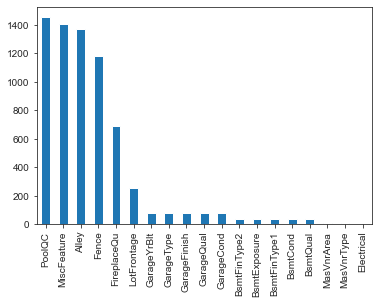

In [10]:
# Visualize missing data
sns.set_style('ticks')
missing = train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(ascending=False, inplace=True)
missing.plot.bar()

print(missing)
print('The number of features with missing data: %i' % missing.count())

The index range is 1460 with a total of 81 columns. Columns with more than 200 missing data can be removed as that is approximately 15% of the data missing. Attempting to fill these data will result in making these features weak predictors. It is better to leave them out entirely. 

The various Garage- features can also be deleted. They don't seem to be features that would contribute heavily to the overall house price. The feature, 'GarageCars', is likely more correlated with the house price given that the number of cars that are able to be parked in the garage is the most important aspect of the garage size. 

The Bsmnt- features could also be deleted given that the most important information is contained in the 'TotalBsmtSF' feature. 

The MasVnr- features are not important as they don't show strong correlations with any of the other features in the heat map. 

For 'Electrical', since there is only one record that is missing, the record can be filled with the most common value for this feature.

In [11]:
# Inspect the values for Electrical
print(train['Electrical'].value_counts())

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64


In [12]:
# Drop missing data
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

train = train.drop((missing_data[missing_data['Total'] > 1]).index, 1)

# Fill missing Electrical data
train['Electrical'] = train['Electrical'].fillna(train['Electrical'].value_counts().index[0])

# Display sum of features with missing data
train.isnull().sum().max()

0

In [13]:
# Inspect the values for Electrical after handling missing value
print(train['Electrical'].value_counts())

SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64


# Determining Most Important Variables 

Since there are both categorical and quantitative variables in the dataset, it's necessary to come up with a strategy to quantify the categorical features so that they can be included in the analysis and later in the models. Categorical features will be encoded using a dictionary to map all of the unique values to numbers that can be used in the model.

In [14]:
quantitative = [i for i in train.columns if train.dtypes[i] != 'object']
quantitative.remove('SalePrice')
quantitative.remove('Id')

qualitative = [i for i in train.columns if train.dtypes[i] == 'object']

In [15]:
print(list(quantitative))
print()
print('Train dataframe has: ', len(quantitative), 'quantitative features')

['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

Train dataframe has:  33 quantitative features


In [16]:
print(list(qualitative))
print()
print('Train dataframe has: ', len(qualitative), 'qualitative features')

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'PavedDrive', 'SaleType', 'SaleCondition']

Train dataframe has:  28 qualitative features


In [17]:
print(train['Neighborhood'].value_counts())

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64


In [18]:
# Encode categorical features as ordered numbers
train = train.replace({'MSZoning' : {'RL': 1, 'RM': 2, 'C (all)': 3, 'FV': 4, 'RH': 5}, 
                       'Street' : {'Grvl' : 1, 'Pave' : 2}, 
                       'LotShape' : {'IR3' : 1, 'IR2' : 2, 'IR1' : 3, 'Reg' : 4}, 
                       'LandContour': {'Lvl': 1, 'Bnk': 2, 'Low': 3, 'HLS': 4}, 
                       'Utilities' : {'ELO' : 1, 'NoSeWa' : 2, 'NoSewr' : 3, 'AllPub' : 4}, 
                       'LotConfig' : {'Inside': 1, 'FR2': 2, 'Corner': 3, 'CulDSac': 4, 'FR3': 5}, 
                       'LandSlope' : {'Sev' : 1, 'Mod' : 2, 'Gtl' : 3}, 
                       'Neighborhood' : {'CollgCr' : 1, 'OldTown' : 2, 'Edwards' : 3, 
                                         'Somerst' : 4, 'Gilbert' : 5, 'NridgHt' : 6, 
                                         'Sawyer' : 7, 'NWAmes' : 8, 'SawyerW' : 9, 
                                         'BrkSide' : 10, 'Crawfor' : 11, 'Mitchel' : 12, 
                                         'NoRidge' : 13, 'Timber' : 14, 'IDOTRR' : 15, 
                                         'ClearCr' : 16, 'StoneBr' : 17, 'SWISU' : 18, 
                                         'Blmngtn' : 19, 'MeadowV' : 20, 'BrDale' : 21, 
                                         'Veenker' : 22, 'NPkVill' : 23, 'Blueste' : 24, 
                                         'NAmes' : 25}, 
                       'Condition1' : {'Norm': 1, 'Feedr': 2, 'PosN': 3, 'Artery': 4, 'RRAe': 5, 
                                       'RRNn': 6, 'RRAn': 7, 'PosA': 8, 'RRNe': 9}, 
                       'Condition2' : {'Norm': 1, 'Artery': 2, 'RRNn': 3, 'Feedr': 4, 'PosN': 5,
                                       'PosA': 6, 'RRAn': 7, 'RRAe': 8}, 
                       'BldgType' : {'1Fam': 1, '2fmCon': 2, 'Duplex': 3, 'TwnhsE': 4, 'Twnhs': 5}, 
                       'HouseStyle' : {'2Story': 1, '1Story': 2, '1.5Fin': 3, '1.5Unf': 4, 'SFoyer': 5, 
                                       'SLvl': 6, '2.5Unf': 7, '2.5Fin': 8}, 
                       'RoofStyle' : {'Gable': 1, 'Hip': 2, 'Gambrel': 3, 'Mansard': 4, 'Flat': 5, 
                                      'Shed': 6}, 
                       'RoofMatl' : {'CompShg': 1, 'WdShngl': 2, 'Metal': 3, 'WdShake': 4, 'Membran': 5, 
                                     'Tar&Grv': 6, 'Roll': 7, 'ClyTile': 8}, 
                       'Exterior1st' : {'VinylSd': 1, 'MetalSd': 2, 'Wd Sdng': 3, 'HdBoard': 4, 'BrkFace': 5, 
                                        'WdShing': 6, 'CemntBd': 7, 'Plywood': 8, 'AsbShng': 9, 'Stucco': 10, 
                                        'BrkComm': 11, 'AsphShn': 12, 'Stone': 13, 'ImStucc': 14, 'CBlock': 15},
                       'Exterior2nd' : {'VinylSd': 1, 'MetalSd': 2, 'Wd Shng': 3, 'HdBoard': 4, 'Plywood': 5, 
                                        'Wd Sdng': 6, 'CmentBd': 7, 'BrkFace': 8, 'Stucco': 9, 'AsbShng': 10, 
                                        'Brk Cmn': 11, 'ImStucc': 12, 'AsphShn': 13, 'Stone': 14, 'Other': 15, 
                                        'CBlock': 16}, 
                       'ExterQual' : {'Po' : 1, 'Fa' : 2, 'TA': 3, 'Gd': 4, 'Ex' : 5},
                       'ExterCond' : {'Po' : 1, 'Fa' : 2, 'TA': 3, 'Gd': 4, 'Ex' : 5},
                       'Foundation' : {'PConc': 1, 'CBlock': 2, 'BrkTil': 3, 'Wood': 4, 'Slab': 5, 
                                       'Stone': 6}, 
                       'Heating' : {'GasA': 1, 'GasW': 2, 'Grav': 3, 'Wall': 4, 'OthW': 5, 
                                    'Floor': 6}, 
                       'HeatingQC' : {'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5},
                       'CentralAir' : {'Y': 1, 'N': 2}, 
                       'Electrical' : {'SBrkr': 1, 'FuseF': 2, 'FuseA': 3, 'FuseP': 4, 'Mix': 5}, 
                       'KitchenQual' : {'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5},
                       'Functional' : {'Sal' : 1, 'Sev' : 2, 'Maj2' : 3, 'Maj1' : 4, 'Mod': 5, 
                                       'Min2' : 6, 'Min1' : 7, 'Typ' : 8},
                       'PavedDrive' : {'N' : 1, 'P' : 2, 'Y' : 3}, 
                       'SaleType' : {'WD': 1, 'New': 2, 'COD': 3, 'ConLD': 4, 'ConLI': 5, 
                                     'CWD': 6, 'ConLw': 7, 'Con': 8, 'Oth': 9}, 
                       'SaleCondition' : {'Normal': 1, 'Abnorml': 2, 'Partial': 3, 'AdjLand': 4, 'Alloca': 5, 
                                          'Family': 6}})

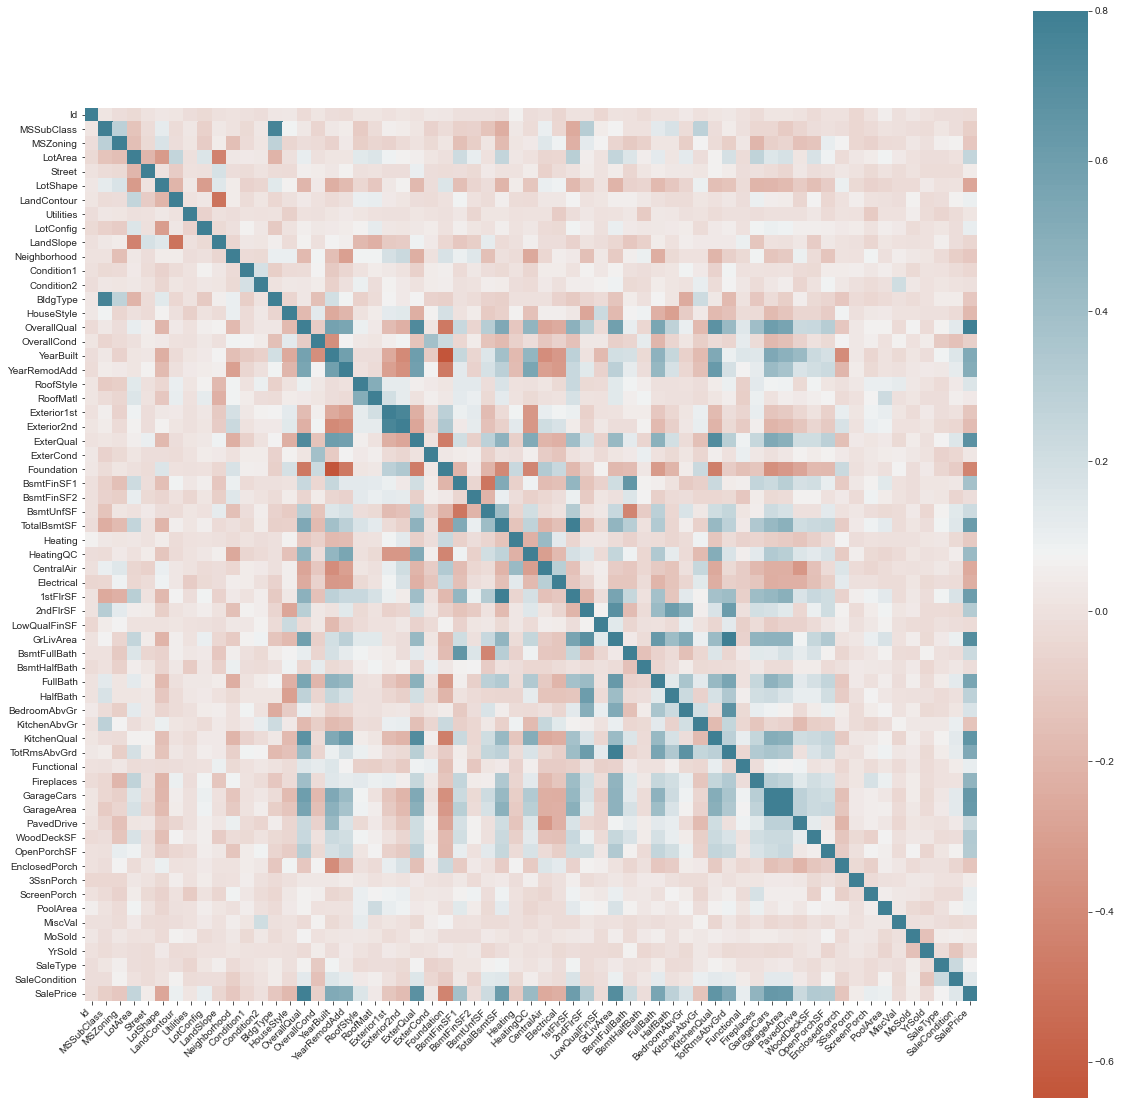

In [19]:
# Correlation matrix/heatmap after encoding
correlation = train.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(correlation, vmax=.8, 
            cmap=sns.diverging_palette(20, 220, n=200), 
            square=True)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right');

Looking at this heat map, it is evident that OverallQual, GrLivArea, ExterQual, GarageCars, and GarageArea have strong relationships with SalePrice. Let's zoom into the features with the highest correlations.

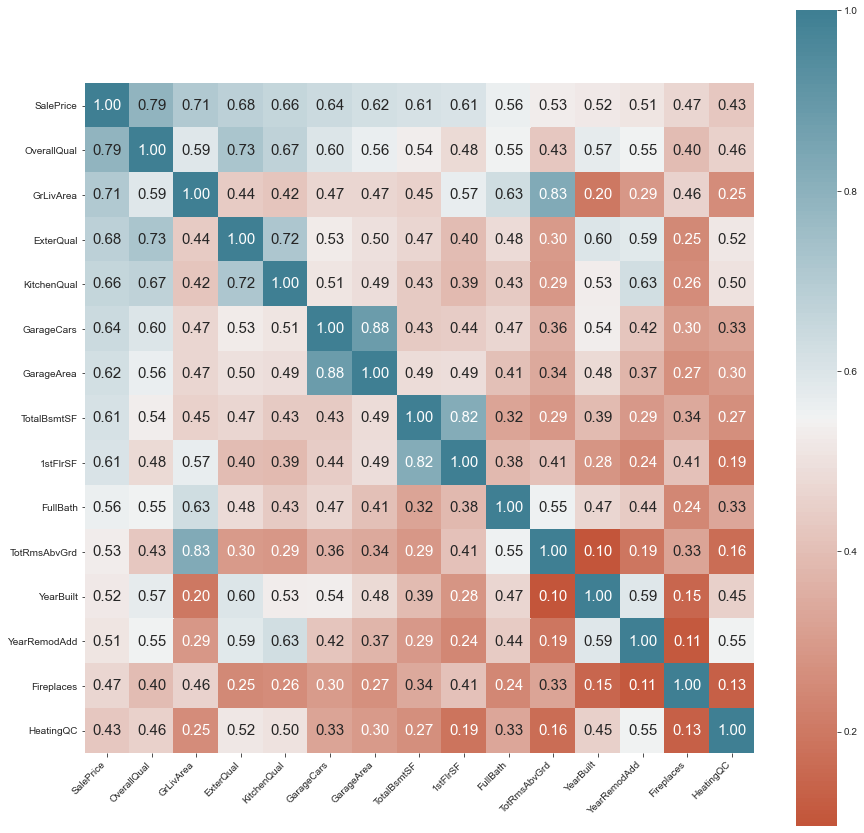

In [20]:
# Zoomed-in heatmap
n = 15
cols = correlation.nlargest(n, 'SalePrice')['SalePrice'].index
correlation = np.corrcoef(train[cols].values.T)
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(correlation, cbar=True, annot=True, 
                 cmap=sns.diverging_palette(20, 220, n=200), 
                 square=True, 
                 fmt='.2f', annot_kws={'size': 15}, 
                 yticklabels=cols.values, 
                 xticklabels=cols.values)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right');

The most important features in determining SalePrice are OverallQual, GrLivArea, ExterQual, KitchenQual, GarageCars, GarageArea, TotalBsmtSF, 1stFlrSF, FullBath, TotRmsAbvGrd, YearBuilt, and YearRemodAdd. Here, I am defining 'important features' as those having correlations greater than 0.50. So far, four out of six (YearBuilt, OverallQual, GrLivArea, and KitchenQual) of the features in my prediction have been shown to be moderately to highly correlated.

# Examing Scatter Plots for Outliers

In [21]:
# Differentiate numerical features (minus the target) and categorical features
categorical_features = train.select_dtypes(include = ['object']).columns
numerical_features = train.select_dtypes(exclude = ['object']).columns
numerical_features = numerical_features.drop('SalePrice')
print('Numerical features : ' + str(len(numerical_features)))
print('Categorical features : ' + str(len(categorical_features)))
train_num = train[numerical_features]
train_cat = train[categorical_features]

Numerical features : 62
Categorical features : 0


In [22]:
cols_to_eval = ['SalePrice', 'OverallQual', 'GrLivArea', 'ExterQual', 
                'KitchenQual', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 
                'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'Fireplaces', 'HeatingQC', 'Neighborhood']

cols_to_eval1 = ['SalePrice', 'OverallQual', 'GrLivArea', 'ExterQual']

cols_to_eval2 = ['SalePrice', 'KitchenQual', 'GarageCars', 'GarageArea']

cols_to_eval3 = ['SalePrice', 'TotalBsmtSF', '1stFlrSF', 'FullBath']

cols_to_eval4 = ['SalePrice', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']

cols_to_eval5 = ['SalePrice', 'Fireplaces', 'HeatingQC', 'Neighborhood']

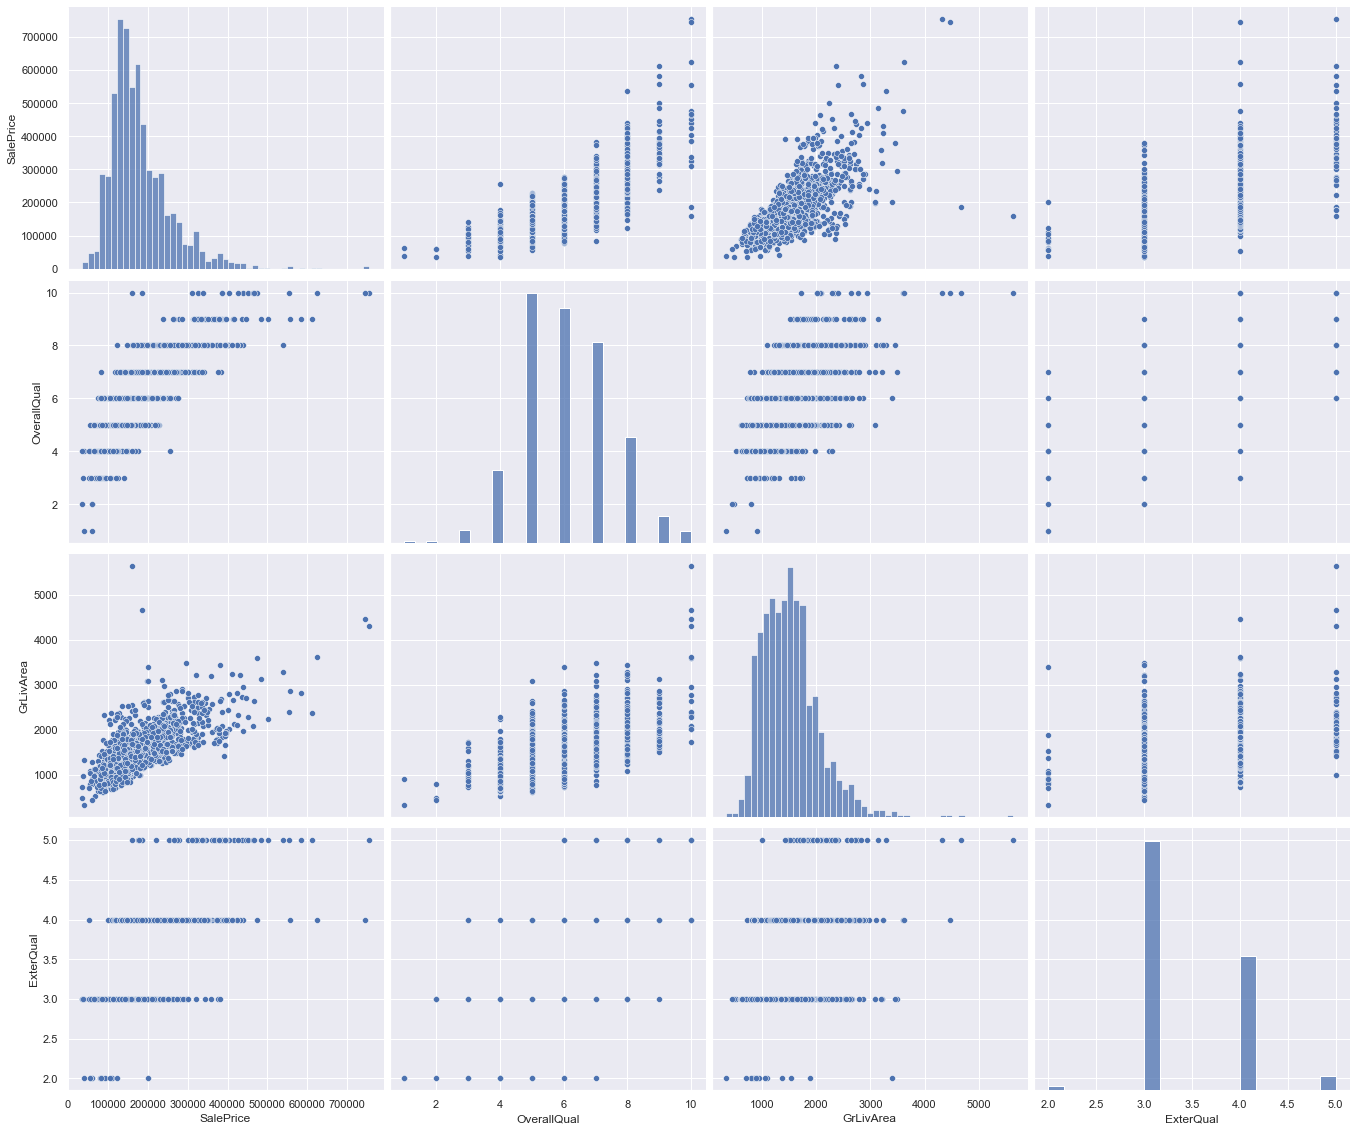

In [23]:
sns.set()

sns.pairplot(train[cols_to_eval1], height = 4, aspect = 1.2)
plt.show();

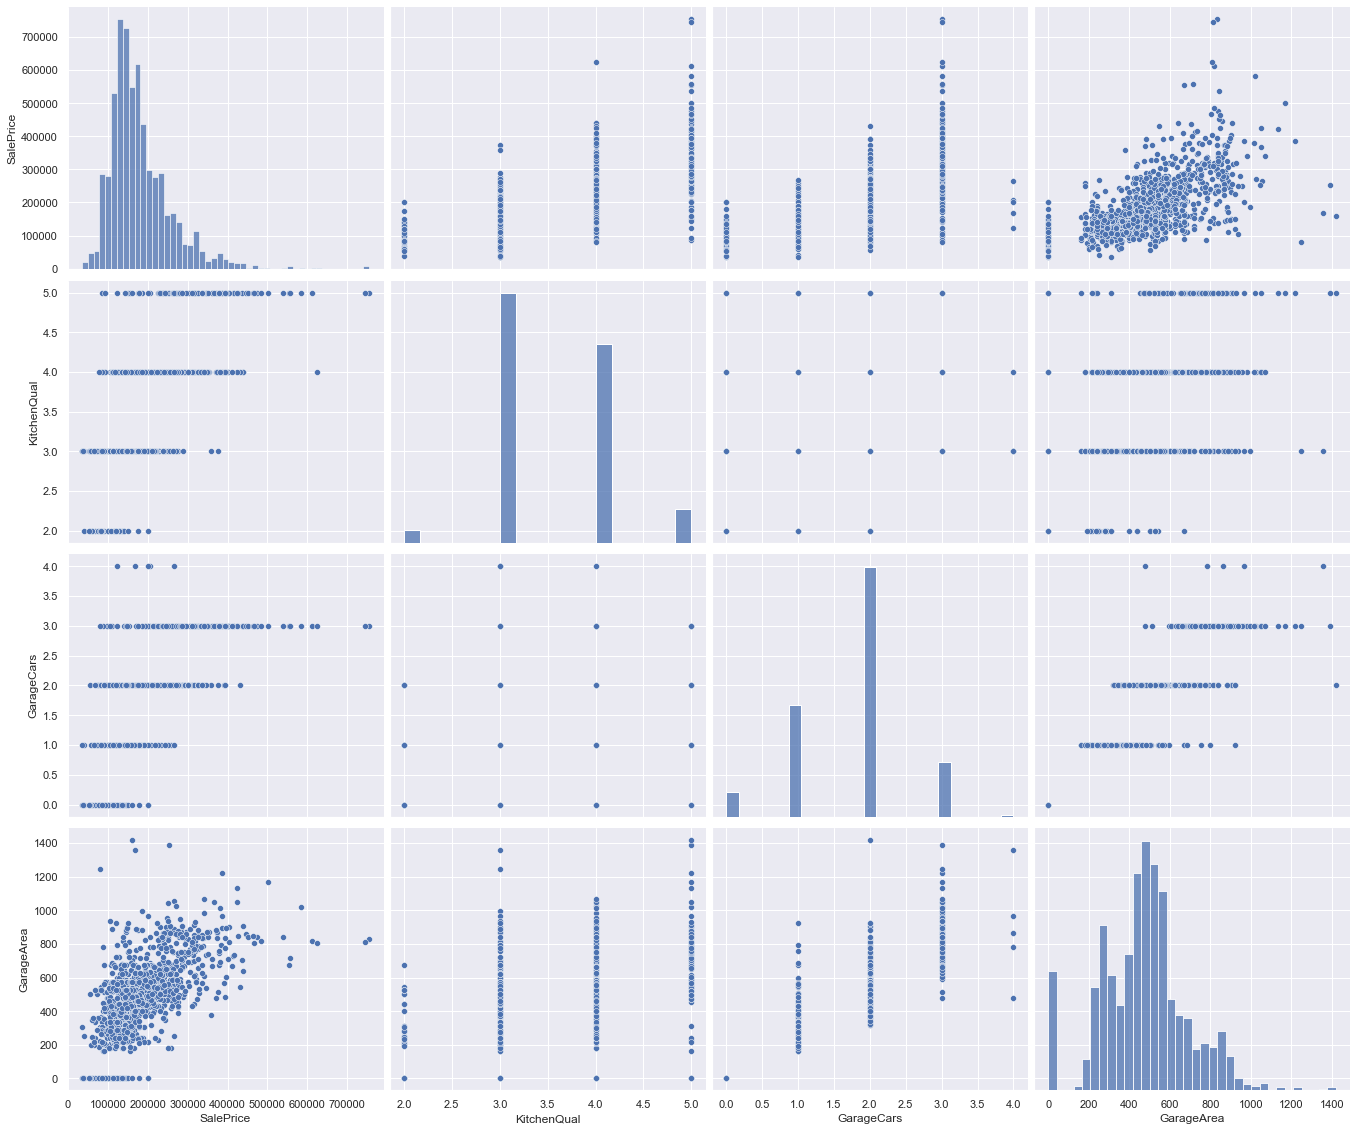

In [24]:
sns.set()

sns.pairplot(train[cols_to_eval2], height = 4, aspect = 1.2)
plt.show();

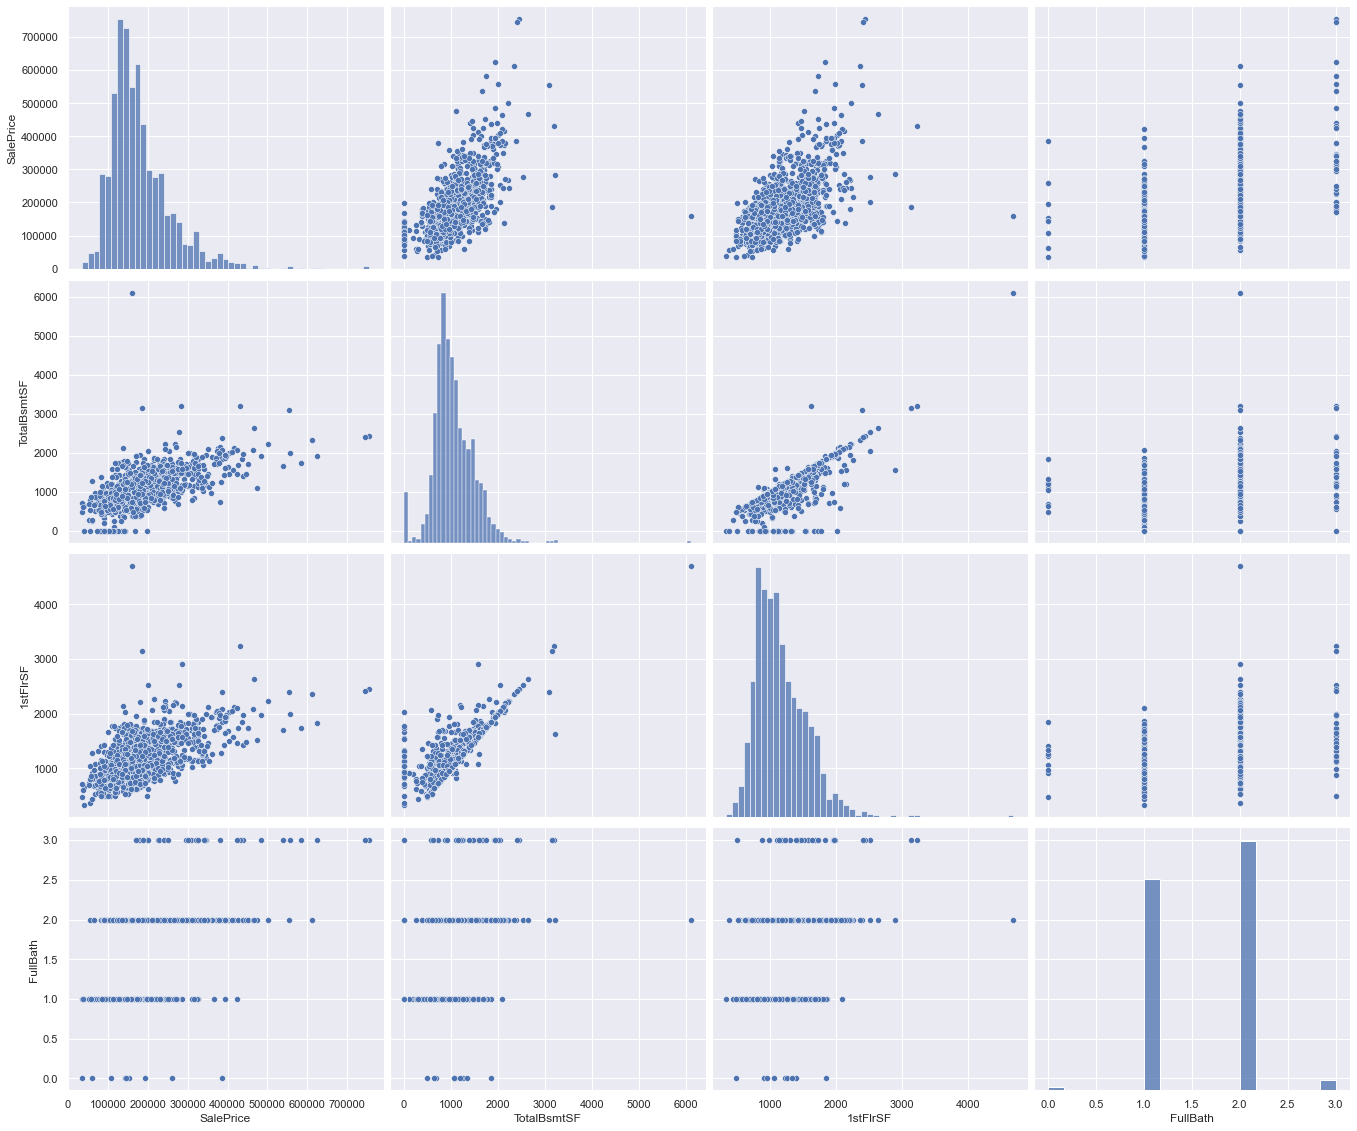

In [25]:
sns.set()

sns.pairplot(train[cols_to_eval3], height = 4, aspect = 1.2)
plt.show();

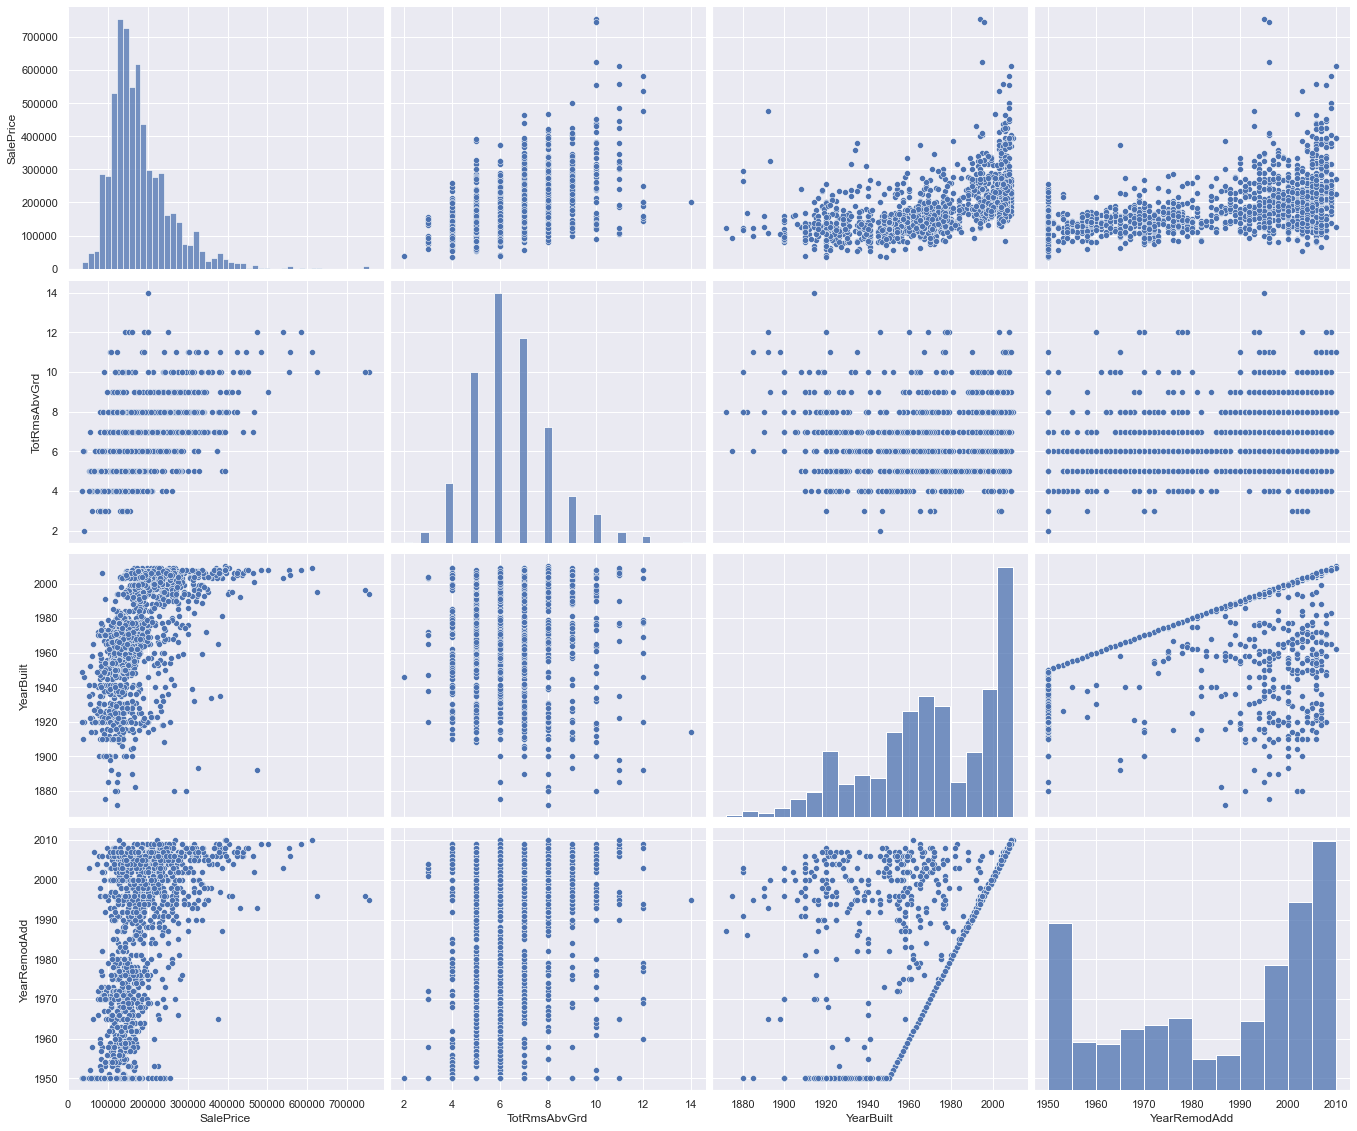

In [26]:
sns.set()

sns.pairplot(train[cols_to_eval4], height = 4, aspect = 1.2)
plt.show();

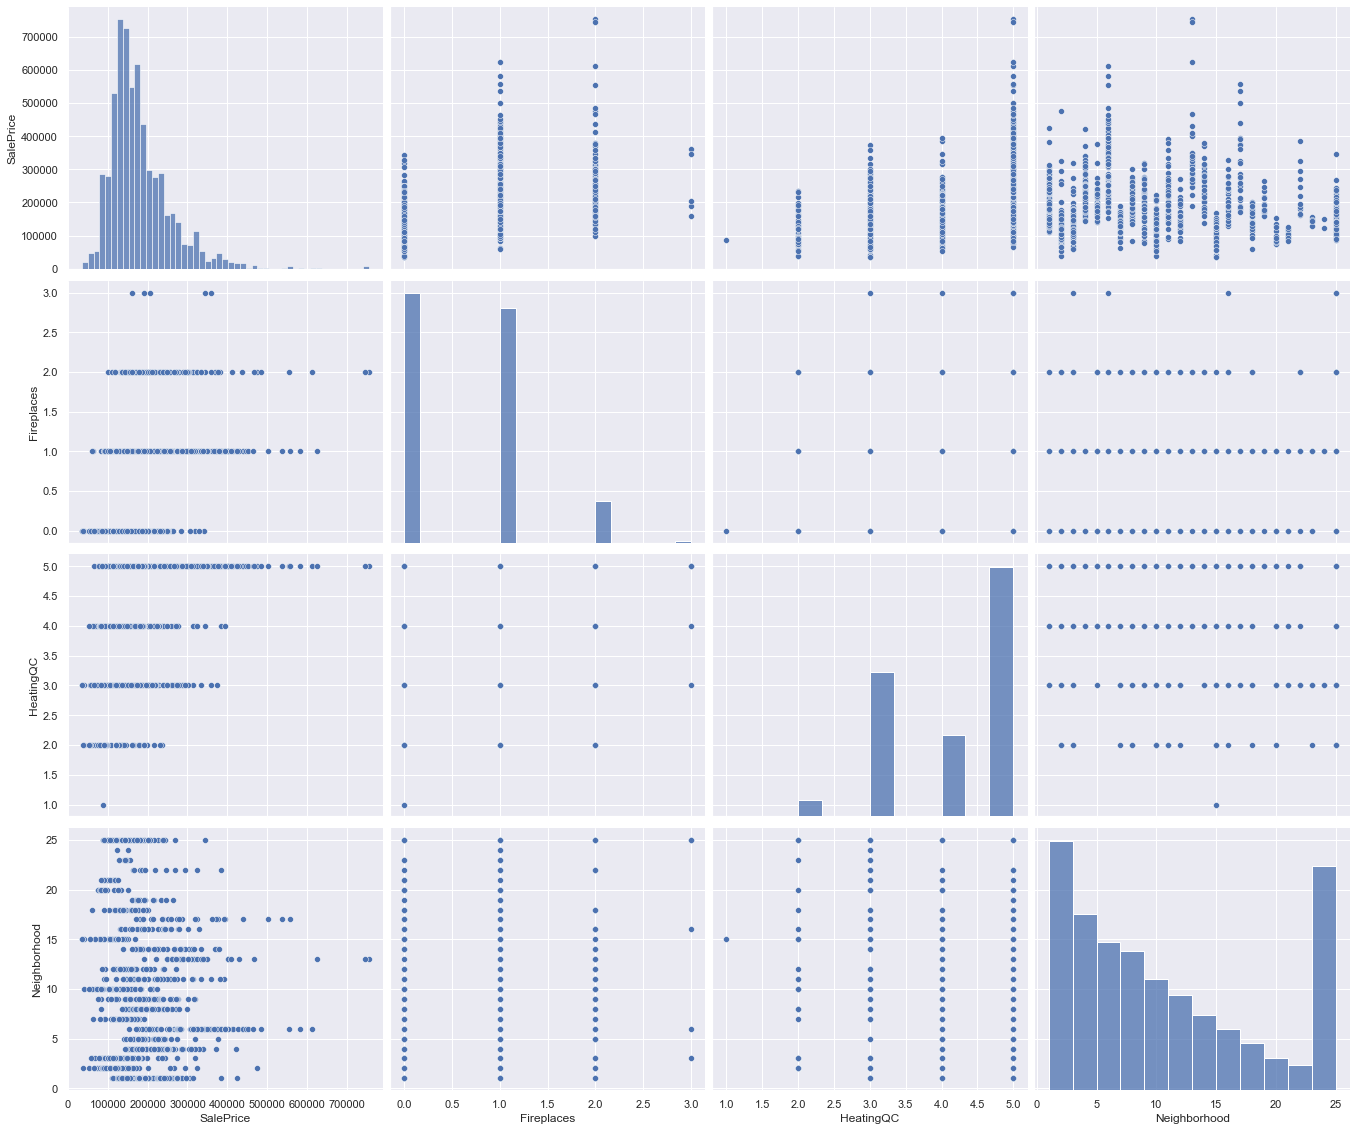

In [27]:
sns.set()

sns.pairplot(train[cols_to_eval5], height = 4, aspect = 1.2)
plt.show();

# Handling Outliers

In general, a skewness with absolute value > 0.5 is considered at least moderately skewed

In [28]:
from scipy.stats import skew

# Log transform skewed numerical features to lessen impact of outliers
cols_quant = ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 
              'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 
              'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 
              'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 
              'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 
              'MiscVal', 'MoSold', 'YrSold']
skewness = train[cols_quant].apply(lambda x: skew(x))
skewness = skewness[abs(skewness) > 0.5]
print(str(skewness.shape[0]) + " skewed numerical features were log transformed")
skewed_features = skewness.index
train[skewed_features] = np.log1p(train[skewed_features])

26 skewed numerical features were log transformed


# Analyzing SalePrice

/Users/paperscissoroxie/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/paperscissoroxie/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/paperscissoroxie/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figur

<AxesSubplot:title={'center':'Johnson SU'}, xlabel='SalePrice'>

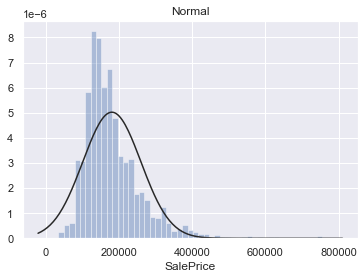

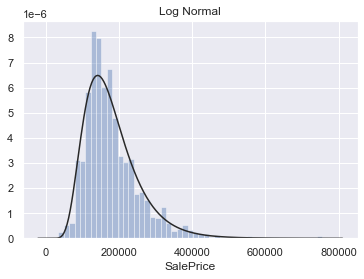

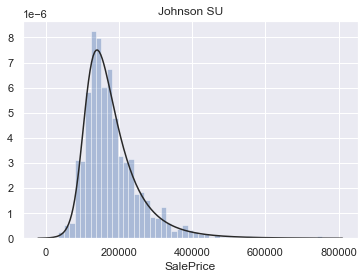

In [29]:
# Check for normality
plt.figure(1); plt.title('Normal')
sns.distplot(train['SalePrice'], kde=False, fit=stats.norm)

plt.figure(2); plt.title('Log Normal')
sns.distplot(train['SalePrice'], kde=False, fit=stats.lognorm)

plt.figure(3); plt.title('Johnson SU')
sns.distplot(train['SalePrice'], kde=False, fit=stats.johnsonsu)

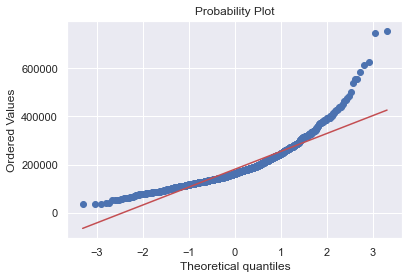

In [30]:
# Probability plot
res = stats.probplot(train['SalePrice'], plot=plt)

In [31]:
# Summary statistics
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [32]:
print("Skewness: %.02f" % train['SalePrice'].skew())
print("Kurtosis: %.02f" % train['SalePrice'].kurt())

Skewness: 1.88
Kurtosis: 6.54


SalePrice does not have a normal distribution, so it will need to be transformed before performing regression. For SalePrice, the best fit is the Unbounded Johnson Distribution as seen above. Log transformation can smooth out the data, removing the skew, to make it more 'normal', which will allow the statistical analysis results from these data to be more valid.

# Standardizing Data

Standardization will convert the data to have a mean of 0 and a standard deviation of 1. 

In [33]:
# Standardizing SalePrice
saleprice_scaled = StandardScaler().fit_transform(train['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83870376]
 [-1.83352844]
 [-1.80092766]
 [-1.78329881]
 [-1.77448439]
 [-1.62337999]
 [-1.61708398]
 [-1.58560389]
 [-1.58560389]
 [-1.5731    ]]

outer range (high) of the distribution:
[[3.82897043]
 [4.04098249]
 [4.49634819]
 [4.71041276]
 [4.73032076]
 [5.06214602]
 [5.42383959]
 [5.59185509]
 [7.10289909]
 [7.22881942]]


<ipython-input-33-4c2975c7a1db>:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  saleprice_scaled = StandardScaler().fit_transform(train['SalePrice'][:,np.newaxis]);


# Bivariate Analysis

My prediction was that YearBuilt, OverallQual, OverallCond, Neighborhood, GrLivArea, and KitchenQual play the biggest roles in determining SalePrice. Let's take a closer look at these relationships with bivariate analysis.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


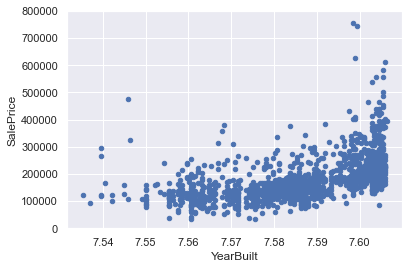

In [34]:
# Bivariate analysis SalePrice/YearBuilt
var = 'YearBuilt'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

SalePrice and YearBuilt have a somewhat linear positive relationship to each other with a shallow slope. This scatterplot reveals that these two variables are not strongly related. Some of the years have vertically clustered data points. This could be due to innacurate records since they tend to occur at 1900, 1920, 1940, etc. 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


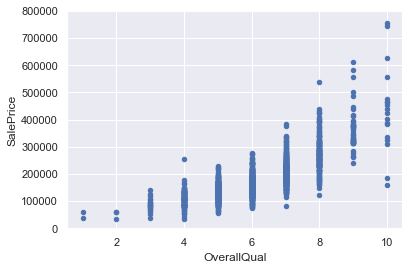

In [35]:
# Bivariate analysis SalePrice/OverallQual
var = 'OverallQual'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

There is a positive, fainlty linear trend between SalePrice and OverallQual whose relationship weakens as OverallQual increases and has a gentle slope.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


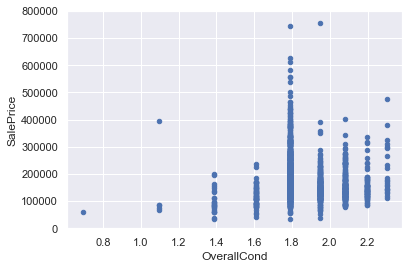

In [36]:
# Bivariate analysis SalePrice/OverallCond
var = 'OverallCond'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

There is a positive, slightly nonlinear trend between SalePrice and OverallQual. In general, as OverallQual increases, SalePrice increases. Because OverallQual is described using discrete values, data points are represented as vertically clustered lines at each x-value. 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


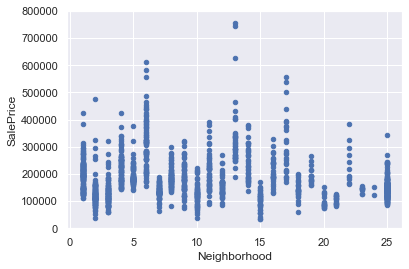

In [37]:
# Bivariate analysis SalePrice/Neighborhood
var = 'Neighborhood'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

There does not appear to be a trend between SalePrice and Neighborhood. 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


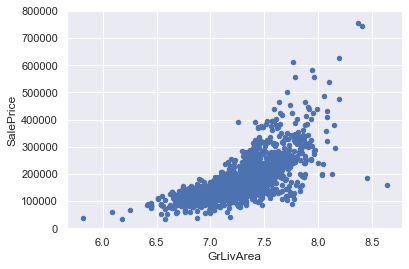

In [38]:
# Bivariate analysis SalePrice/GRLivArea
var = 'GrLivArea'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

There is a positive, linear trend between SalePrice and GrLivArea whose relationship weakens as GrLivArea increases and has a moderately steep slope. There are some outliers above 4,000 square feet. The two that have a SalePrice of greater than 700,000 may be located in an area that is highly desireable. However, they follow the overall trend of the data, so they will remain in the analysis. The two that have a SalePrice of less than 200,000 may be located in rural areas or areas that are not desireable. These two data points are not representative of the rest of the dataset, so these can be removed to avoid errors in the analysis.  

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


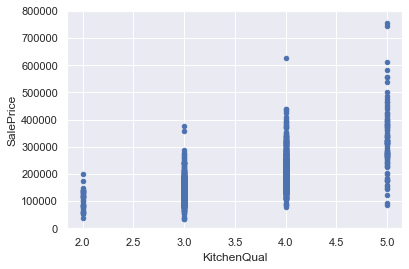

In [39]:
# Bivariate analysis SalePrice/KitchenQual
var = 'KitchenQual'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

There is a positive, linear trend between SalePrice and KitchenQual though the degree of scatter indicates a weak relationship that continues to weaken as KitchenQual increases. 

A closer look at these variables and their relationship to SalePrice shows that these variables are not as closely related as one might first intuit. Of the initial predictions, OverallQual, GrLivArea, and KitchenQual have the strongest relationship with SalePrice, though the relationships all seem to weaken as these features increase. It is surprising the YearBuilt and Neigborhood don't have a stronger relationship. The relationship seen here between SalePrice and YearBuilt can be explained by the fact that people tend to remodel homes and make improvements throughout their occupancy. Given that the Neighborhood feature is represented here in a nominal manner (no ordering is possible or implied in the levels), a relationship does not emerge in this analysis.

In [40]:
# Delete outliers
train = train[train.GrLivArea < 4500]
train.reset_index(drop=True, inplace=True)

train = train[train.TotalBsmtSF < 3000]
train.reset_index(drop=True, inplace=True)

# Normality

Normality for SalePrice has already been examined by visualizing its distribution plot, examining skew and kurtosis, and observing its probability plot. It is not normal, shows peakedness, positive skewness, and does not follow a diagonal line in its probability plot. Log transformations can help with positive skewness.

In [41]:
# Log transformation
train['SalePrice'] = np.log(train['SalePrice'])

/Users/paperscissoroxie/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


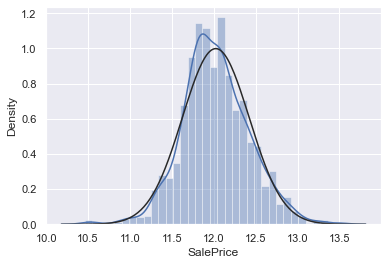

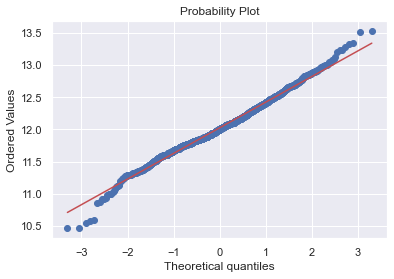

In [42]:
# Visualize transformed histogram and normal probability plot
sns.distplot(train['SalePrice'], fit=stats.norm)
plt.figure()

res = stats.probplot(train['SalePrice'], plot=plt)

# Modeling

Preparing data for modeling

In [43]:
# Combine categorical and numerical features
cols_for_mod = ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 
                'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 
                'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 
                'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 
                'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 
                'MiscVal', 'MoSold', 'YrSold', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 
                'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 
                'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 
                'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'PavedDrive', 
                'SaleType', 'SaleCondition', 'SalePrice']

train = train[cols_for_mod]

print('Shape of dataframe: ' + str(train.shape))
print()
print('Column names: ' + str(list(train.columns)))
print()

# DataFrame with features only
train_fr = train.copy()
train_fr.drop(['SalePrice'], inplace = True, axis = 1)

# Segregate features and labels into separate variables
X,y = train_fr, train['SalePrice']

print('Number of independent variables: ' + str(X.shape[1]))
print()

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV

# Standardize features
std = StandardScaler()
X = std.fit_transform(X)

# Partition the dataset in train + validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

print('X_train : ' + str(X_train.shape))
print('X_test : ' + str(X_test.shape))
print('y_train : ' + str(y_train.shape))
print('y_test : ' + str(y_test.shape))

Shape of dataframe: (1460, 62)

Column names: ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'PavedDrive', 'SaleType', 'SaleCondition', 'SalePrice']

Number of independent variables: 61

X_train : (1022, 61)
X_test : (438, 61)
y_train : (1022,)
y_test : (4

In [44]:
# RMSE
def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv = 5))
    return(rmse)

def rmse_cv_test(model):
    rmse= np.sqrt(-cross_val_score(model, X_test, y_test, scoring='neg_mean_squared_error', cv = 5))
    return(rmse)

### Linear Regression

Regression is a supervised learning task used to predict a target numeric value from a set of related features. Linear regression assumes a linear relationship between the target and inputs.

RMSE on Train set : 0.2058753430825945
RMSE on Test set : 30350035354.640392


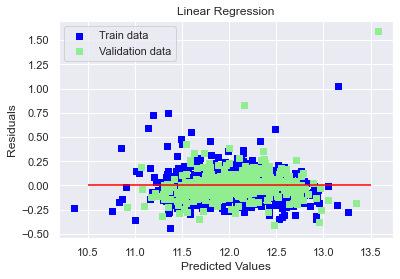

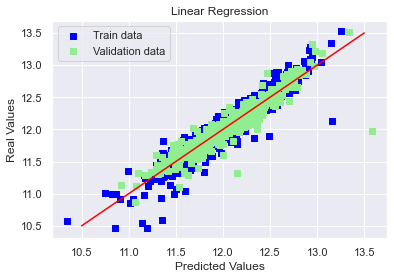

In [45]:
# Linear Regression Without Regularization

lr = LinearRegression()
lr.fit(X_train, y_train)

# Look at predictions on training and validation set
print('RMSE on Train set :', rmse_cv_train(lr).mean())
print('RMSE on Test set :', rmse_cv_test(lr).mean())

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Plot residuals
plt.scatter(y_train_pred, y_train_pred - y_train, c = 'blue', marker = 's', label = 'Train data')
plt.scatter(y_test_pred, y_test_pred - y_test, c = 'lightgreen', marker = 's', label = 'Validation data')
plt.title('Linear Regression')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = 'red')
plt.show()

# Plot predictions
plt.scatter(y_train_pred, y_train, c = 'blue', marker = 's', label = 'Train data')
plt.scatter(y_test_pred, y_test, c = 'lightgreen', marker = 's', label = 'Validation data')
plt.title('Linear Regression')
plt.xlabel('Predicted Values')
plt.ylabel('Real Values')
plt.legend(loc = 'upper left')
plt.plot([10.5, 13.5], [10.5, 13.5], c = 'red')
plt.show()

Residuals are the difference between the observed value of the target value and the predicted value (the error of prediction). In the residual plot, the predicted values are on the x-axis and the error on the y-axis. The residuals are fairly randomly and uniformly disbursed around the zero line (meaning a linear regresion model is appropriate for the data) and cluster around it, so the model is performing well. 

The Root Mean Squared Error (RMSE) score is pretty low on the Train set, but high in the Test set. The RMSE gives an estimate of spread of observed data points across the predicted regression line. There is a large difference between the RMSE on Train set (0.2058753430825945) and the RMSE on Test set (30350035354.640392), so it looks like the model is overfitting. The low RMSE score on the Training set shows that it is fitting the data well there. Let's take a look at other models to see if we can see improved performance.

### LASSO Regression

Regularized regression adds penalties to the loss function during training, which constrains the coefficient estimates to zero. The loss function is a measure that indicates how well the model’s coefficients have fit the underlying data. Regularization assists with avoiding overfitting and reduces model complexity, which can occur in simple linear regression. It is a useful method for handling collinearity and filter out noise from data.

LASSO regression (L1 regularization) limits the size of the coefficient by adding an L1 penalty equal to the absolute value of the magnitude of coefficients. That is, we sum the absolute value of the weights. This type of regression uses shrinkage, which is where data values are shrunk towards a central point such as the mean. LASSO stands for Least Absolute Shrinkage and Selection Operator. LASSO regression can help with feature selection as it can lead to zero coefficients for some of the features, which means they will be completely neglected for the evaluation of the output. This is useful when we have a high dimensional dataset with features that are irrelevant.

In [46]:
X_df = pd.DataFrame(X_train, columns = train_fr.columns)

print(X_df.head())

   MSSubClass   LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0    0.424462  0.067561     0.651479    -0.460408   0.850270      0.637809   
1    1.419810 -2.209329    -0.071836    -0.460408   0.817728      0.589790   
2   -1.125202 -0.440880    -0.795151     1.248500  -0.431095      1.116675   
3    0.164262  0.001486    -0.071836    -0.460408  -1.064620     -1.694613   
4   -0.559216 -0.144744    -2.965098    -0.460408  -1.704380     -1.694613   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  ...  Foundation   Heating  \
0    0.794683   -0.355342   0.063027     0.186477  ...   -0.874617 -0.127554   
1    0.896687   -0.355342   0.009738     0.360936  ...   -0.874617 -0.127554   
2    0.774668   -0.355342  -0.299251     0.004548  ...    0.328909 -0.127554   
3    0.365520   -0.355342   0.123751    -0.367442  ...    1.532434 -0.127554   
4    0.482641   -0.355342  -3.047600    -0.940555  ...    0.328909 -0.127554   

   HeatingQC  CentralAir  Electrical  KitchenQual 

Best alpha : 0.003
More precision with alphas centered around 0.003
Best alpha : 0.003
LASSO RMSE on Train set : 0.13368814791535225
LASSO RMSE on Test set : 0.15266185052830566


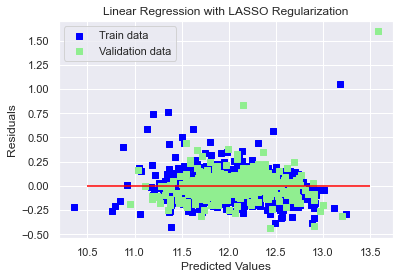

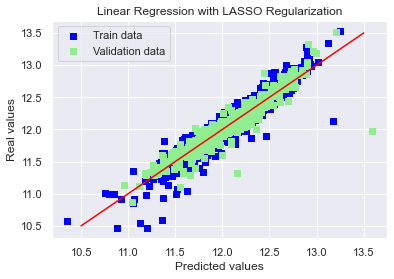

LASSO picked 41 features and eliminated 20 features


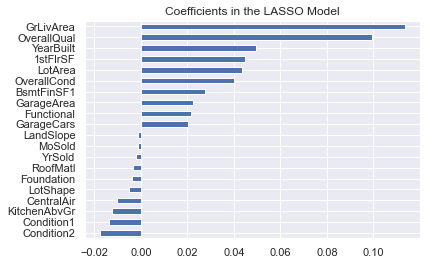

In [47]:
# LASSO Regression With L1 Regularization

lasso = LassoCV(alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 
                          0.3, 0.6, 1], 
                max_iter = 50000, cv = 10)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print('Best alpha :', alpha)

print('More precision with alphas centered around ' + str(alpha))
lasso = LassoCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, 
                          alpha * .85, alpha * .9, alpha * .95, alpha, alpha * 1.05, 
                          alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, alpha * 1.35, 
                          alpha * 1.4], 
                max_iter = 50000, cv = 10)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print('Best alpha :', alpha)

print('LASSO RMSE on Train set :', rmse_cv_train(lasso).mean())
print('LASSO RMSE on Test set :', rmse_cv_test(lasso).mean())
y_train_las = lasso.predict(X_train)
y_test_las = lasso.predict(X_test)

# Plot residuals
plt.scatter(y_train_las, y_train_las - y_train, c = 'blue', marker = 's', label = 'Train data')
plt.scatter(y_test_las, y_test_las - y_test, c = 'lightgreen', marker = 's', label = 'Validation data')
plt.title('Linear Regression with LASSO Regularization')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = 'red')
plt.show()

# Plot predictions
plt.scatter(y_train_las, y_train, c = 'blue', marker = 's', label = 'Train data')
plt.scatter(y_test_las, y_test, c = 'lightgreen', marker = 's', label = 'Validation data')
plt.title('Linear Regression with LASSO Regularization')
plt.xlabel('Predicted values')
plt.ylabel('Real values')
plt.legend(loc = 'upper left')
plt.plot([10.5, 13.5], [10.5, 13.5], c = 'red')
plt.show()

# Plot important coefficients
coefs = pd.Series(lasso.coef_, index = X_df.columns)
print('LASSO picked ' + str(sum(coefs != 0)) + ' features and eliminated ' +  \
      str(sum(coefs == 0)) + ' features')
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = 'barh')
plt.title('Coefficients in the LASSO Model')
plt.show()

The RMSE scores for LASSO regression show quite an improvement! The RMSE score on the Train set is 0.13368814791535225 and 0.15266185052830566 for the Test set. In addition, LASSO picked 41 features and eliminated 20 features. Alpha is the parameter that balances the amount of emphasis given to minimizing the residual sum of squares vs minimizing sum of square of coefficients.

The highest weights have been assigned to GrLivArea, OverallQual, YearBuilt, 1stFlrSF, and LotArea. This is somewaht in line with the earlier predictions that YearBuilt, OverallQual, and GrLivArea play the biggest roles in determining SalePrice! The features LASSO picked make sense on an intuitive level.

### Ridge Regression

Ridge regression is used for estimating the coefficients where independent variables are highly correlated. The cost function is altered by adding a penalty equivalent to square of the magnitude of the coefficients. The cost function can be used to show how badly a model is performing. Ridge regression helps understand the degree of overfitting of the data by measuring the magnitude of the coefficients.

Best alpha : 60.0
More precision with alphas centered around 60.0
Best alpha : 75.0
Ridge RMSE on Train set : 0.13582790751257817
Ridge RMSE on Test set : 0.15671943639084562


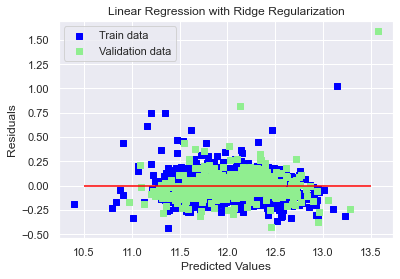

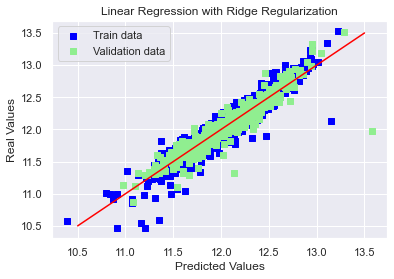

Ridge picked 61 features and eliminated 0 features


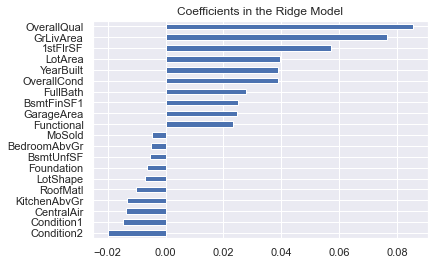

In [48]:
# Ridge Regression With L2 Regularization

ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print('Best alpha :', alpha)

print('More precision with alphas centered around ' + str(alpha))
ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], 
                cv = 10)
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print('Best alpha :', alpha)

print('Ridge RMSE on Train set :', rmse_cv_train(ridge).mean())
print('Ridge RMSE on Test set :', rmse_cv_test(ridge).mean())
y_train_rdg = ridge.predict(X_train)
y_test_rdg = ridge.predict(X_test)

# Plot residuals
plt.scatter(y_train_rdg, y_train_rdg - y_train, c = 'blue', marker = 's', label = 'Train data')
plt.scatter(y_test_rdg, y_test_rdg - y_test, c = 'lightgreen', marker = 's', label = 'Validation data')
plt.title('Linear Regression with Ridge Regularization')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = 'red')
plt.show()

# Plot predictions
plt.scatter(y_train_rdg, y_train, c = 'blue', marker = 's', label = 'Train data')
plt.scatter(y_test_rdg, y_test, c = 'lightgreen', marker = 's', label = 'Validation data')
plt.title('Linear Regression with Ridge Regularization')
plt.xlabel('Predicted Values')
plt.ylabel('Real Values')
plt.legend(loc = 'upper left')
plt.plot([10.5, 13.5], [10.5, 13.5], c = 'red')
plt.show()

# Plot important coefficients
coefs = pd.Series(ridge.coef_, index = X_df.columns)
print('Ridge picked ' + str(sum(coefs != 0)) + ' features and eliminated ' +  \
      str(sum(coefs == 0)) + ' features')
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = 'barh')
plt.title('Coefficients in the Ridge Model')
plt.show()

The RMSE scores were slightly better with LASSO regression than with Ridge regression. The RMSE score on the Train set is 0.13582790751257817 and on the Test set is 0.15671943639084562 Ridge did not eliminate any features given that Ridge Regression does not make coefficients absolute zero whereas LASSO Regression will. Alpha is the parameter that balances the amount of emphasis given to minimizing the residual sum of squares vs minimizing sum of square of coefficients

The features with the highest weights are OverallQual, GrLivArea, and 1stFlrSF.

### Gradient Boosting and XGBoost

Gradient Boosting is an improvement on decision tress. New trees fit on an improved version of the training dataset by fitting the new predictor to the residual errors made by the previous predictor until no further improvements can be made. Decision tree-based algorithms are best for small to medium structured/tabular datasets.

XGBoost is another variant of the Gradient Boost Machine algorithm that is higher-performing. It is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. XGBoost can be used for regression, classification, ranking, and user-defined problems.

In [56]:
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

gbr = GradientBoostingRegressor(n_estimators=3500, 
                                learning_rate=0.01, 
                                max_depth=3, 
                                max_features='sqrt', 
                                min_samples_leaf=15, 
                                min_samples_split=15, 
                                loss='huber', 
                                random_state=42)  

xgboost = XGBRegressor(learning_rate=0.01, 
                       n_estimators=3500, 
                       max_depth=3, 
                       min_child_weight=0, 
                       gamma=0, 
                       subsample=0.7, 
                       colsample_bytree=0.7, 
                       objective='reg:squarederror', 
                       nthread=-1, 
                       scale_pos_weight=1, 
                       seed=42, 
                       reg_alpha=0.00006)

print('RMSE for Gradient Boosting on Train Set :', rmse_cv_train(gbr).mean())
print('RMSE for Gradient Boosting on Test Set :', rmse_cv_test(gbr).mean())

print()

print('RMSE for XGBoost on Train Set :', rmse_cv_train(xgboost).mean())
print('RMSE for XGBoost on Test Set :', rmse_cv_test(xgboost).mean())

RMSE for Gradient Boosting on Train Set : 0.12643931546681636
RMSE for Gradient Boosting on Test Set : 0.13539572027541064

RMSE for XGBoost on Train Set : 0.1301130609216708
RMSE for XGBoost on Test Set : 0.1376532570316394


The RMSE scores remain fairly consistent with those of the regression analysis. The Train versus Test RMSE scores remain close to each other, which shows that overfitting is not occurring. The following notes were used to tune the models.

Tuning the Gradient Boosting Model:
- Tree-Specific Parameters -- affect each individual tree in the model.
    - max_depth: Used to control overfitting. Higher depths allow for the model to learn more about the relationships in the data. Typical values: 3-10
    - max_features: Generally, the square root of the total number of features works well, but checking 30-40% of the total number of features is a good idea. Higher values can lead to overfitting.
    - min_samples_leaf: Used to control overfitting.
    - min_samples_split: Used to control overfitting. The higher the minimum number of samples, the better the generalizations the model can make, however, too high can lead to underfitting since it is considering more samples at each node before splitting.
- Boosting Parameters -- affect the boosting operation in the model.
    - n_estimators: Should be balanced with the learning_rate. Higher numbers can overfit, but Gradient Boosting performs well with high numbers. Higher number of trees can also be computationally expensive.
    - learning_rate: Lower rates allow for the model to generalize well, but a higher number of trees will be needed. This should be balanced because a higher number of trees requires increasing computational power. Generally, 0.01-0.2 is the range used.
- Miscellaneous Parameters -- parameters for overall functioning.
    - loss: The loss function to be minimized at each split. 
    - random_state: Needed so that same random numbers are generated every time for each parameter. It is helpful to keep the random_state constant across models so that performance metrics can be compared. 
                                
Tuning the XGBoost Model:
- General Parameters -- overall functioning
    - nthread: Used for parallel processing and number of cores
- Booster Parameters -- guide the individual booster (tree/regression) at each step
    - n_estimators: Should be balanced with the learning_rate. Higher numbers can overfit, but Gradient Boosting performs well with high numbers. Higher number of trees can also be computationally expensive.
    - learning_rate (eta): Lower rates allow for the model to generalize well, but a higher number of trees will be needed. This should be balanced because a higher number of trees requires increasing computational power. Typical values: 0.01-0.2 
    - max_depth: Used to control overfitting. Higher depths allow for the model to learn more about the relationships in the data. Typical values: 3-10
    - min_child_weight: Similar to min_child_leaf in GBM. Used to control overfitting. Higher values help generalize, but too high could lead to underfitting. Choose small values if dealing with a highly imbalanced class problem.
    - gamma: Specifies the minimum loss reduction required to make a split. Makes the algorithm conservative.
    - subsample: The fraction of observations to randomly sample for each tree. Lower values prevent overfitting (makes the algorithm conservative), but too low could lead to underfitting and high generalization. Typical values: 0.5-1
    - colsample_bytree: Similar to max_features in GBM. Higher values can lead to overfitting. Typical values: 0.5-1
    - reg_alpha: L1 regularization term on weight (LASSO) and can be used in cases where there is high dimensionality
    - scale_pos_weight: A value greater than 0 can be used when there is high class imbalance. A value of 1 can be used in a case of high class imbalance.
- Learning Task Parameters -- guide the optimization performed
    - objective: Defines the loss function.
    - seed: Random number seed.

# Conclusions

LASSO and Ridge regression showed that OverallQual and GrLivArea are important features in predicting SalePrice. My initial prediction was that YearBuilt, OverallQual, OverallCond, Neighborhood, GrLivArea, KitchenQual were the features that would contribute most to SalePrice. Of my predictions, all but Neighborhood and KitchenQual were selected as important features in the various regression analyses. It was surprising that Neighborhood did not emerge as an important feature in the analyses. I believe this can be explained by the fact that the Neighborhood feature is represented in the dataset in a nominal manner (no ordering is possible or implied in the levels). A better analysis could be made if the feature were represented as neighborhood quality.

# References

Kaggle
- https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python
- https://www.kaggle.com/jesucristo/1-house-prices-solution-top-1?scriptVersionId=20214677
- https://www.kaggle.com/juliencs/a-study-on-regression-applied-to-the-ames-dataset
- https://www.kaggle.com/dgawlik/house-prices-eda

Medium
- https://medium.com/@kyawsawhtoon/log-transformation-purpose-and-interpretation-9444b4b049c9
- https://towardsdatascience.com/how-do-you-check-the-quality-of-your-regression-model-in-python-fa61759ff685

Books
- Géron, Aurélien: Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow
- Hair et al. (2013): https://amzn.to/2uC3j9p

Other
- https://www.reneshbedre.com/blog/linear-regression.html
- https://www.scikit-yb.org/en/latest/api/regressor/residuals.html
- https://www.statisticshowto.com/regularized-regression/
- https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/
- https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/